# Ploting different new features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.style.use('seaborn')

import sys
sys.path.append("..") # Adds higher directory to python modules path.
from ta import *

In [2]:
# Load data
df = pd.read_csv('../data/datas.csv', sep=',')
df = utils.dropna(df)

In [3]:
df.shape

(46306, 8)

In [4]:
df.head()

,Timestamp,Open,High,Low,Close,Volume_BTC,Volume_Currency,Weighted_Price
0,1315918800,5.80,6.00,5.80,6.00,25.000000,149.190000,5.967600
1,1315922400,5.95,5.95,5.76,5.76,22.353982,132.041023,5.906823
2,1315926000,5.65,5.65,5.65,5.65,2.542000,14.362300,5.650000
6,1315940400,5.92,5.97,5.92,5.97,8.475400,50.504066,5.958901
18,1315983600,5.58,5.62,5.54,5.62,16.425700,91.537032,5.572793


In [5]:
# Add all ta features filling nans values
df = add_all_ta_features(df, "Open", "High", "Low", "Close", "Volume_BTC", fillna=True)
df.isnull().sum()

../ta/trend.py:605: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  aroon_up = close.rolling(n).apply(lambda x: float(np.argmax(x) + 1) / n * 100)
../ta/trend.py:627: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  aroon_down = close.rolling(n).apply(lambda x: float(np.argmin(x) + 1) / n * 100)


Timestamp                0
Open                     0
High                     0
Low                      0
Close                    0
Volume_BTC               0
Volume_Currency          0
Weighted_Price           0
volume_adi               0
volume_obv               0
volume_obvm              0
volume_cmf               0
volume_fi                0
volume_em                0
volume_vpt               0
volume_nvi               0
volatility_atr           0
volatility_bbh           0
volatility_bbl           0
volatility_bbm           0
volatility_bbhi          0
volatility_bbli          0
volatility_kcc           0
volatility_kch           0
volatility_kcl           0
volatility_kchi          0
volatility_kcli          0
volatility_dch           0
volatility_dcl           0
volatility_dchi          0
                        ..
trend_adx                0
trend_adx_pos            0
trend_adx_neg            0
trend_adx_ind            0
trend_vortex_ind_pos     0
trend_vortex_ind_neg     0
t

In [6]:
df.shape

(46306, 66)

# Ploting some volatility features

### Bollinger Bands

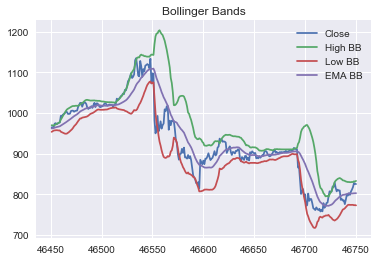

In [7]:
plt.plot(df[40700:41000].Close)
plt.plot(df[40700:41000].volatility_bbh, label='High BB')
plt.plot(df[40700:41000].volatility_bbl, label='Low BB')
plt.plot(df[40700:41000].volatility_bbm, label='EMA BB')
plt.title('Bollinger Bands')
plt.legend()
plt.show()

### Keltner Channel

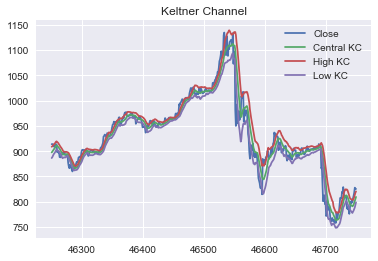

In [8]:
plt.plot(df[40500: 41000].Close)
plt.plot(df[40500: 41000].volatility_kcc, label='Central KC')
plt.plot(df[40500: 41000].volatility_kch, label='High KC')
plt.plot(df[40500: 41000].volatility_kcl, label='Low KC')
plt.title('Keltner Channel')
plt.legend()
plt.show()

### Donchian Channel

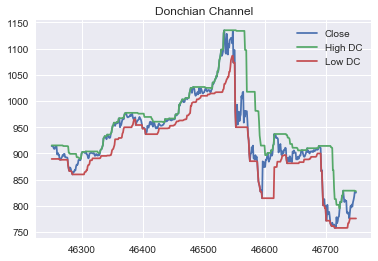

In [9]:
plt.plot(df[40500: 41000].Close)
plt.plot(df[40500: 41000].volatility_dch, label='High DC')
plt.plot(df[40500: 41000].volatility_dcl, label='Low DC')
plt.title('Donchian Channel')
plt.legend()
plt.show()

# Ploting trend features

### MACD

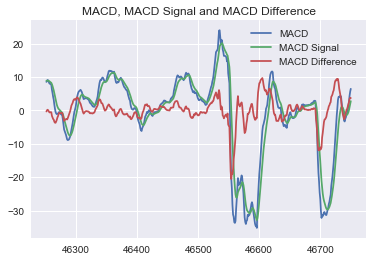

In [10]:
plt.plot(df[40500:41000].trend_macd, label='MACD')
plt.plot(df[40500:41000].trend_macd_signal, label='MACD Signal')
plt.plot(df[40500:41000].trend_macd_diff, label='MACD Difference')
plt.title('MACD, MACD Signal and MACD Difference')
plt.legend()
plt.show()

### KST

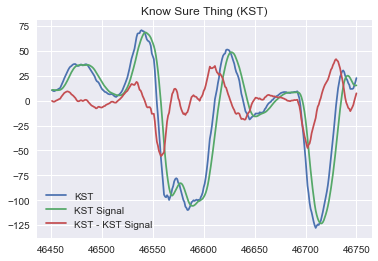

In [11]:
plt.plot(df[40700:41000].trend_kst, label='KST')
plt.plot(df[40700:41000].trend_kst_sig, label='KST Signal')
plt.plot(df[40700:41000].trend_kst_diff, label='KST - KST Signal')
plt.title('Know Sure Thing (KST)')
plt.legend()
plt.show()
#plt.savefig('test.png', bbox_inches='tight')

### Ichimoku Kinkō Hyō

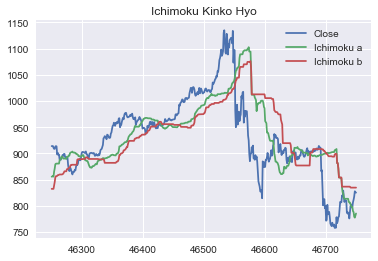

In [12]:
plt.plot(df[40500:41000].Close)
plt.plot(df[40500:41000].trend_ichimoku_a, label='Ichimoku a')
plt.plot(df[40500:41000].trend_ichimoku_b, label='Ichimoku b')
plt.title('Ichimoku Kinko Hyo')
plt.legend()
plt.show()

# Ploting all features

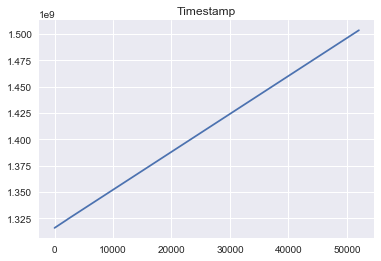

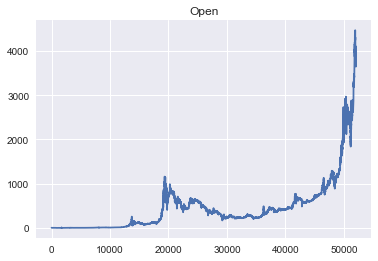

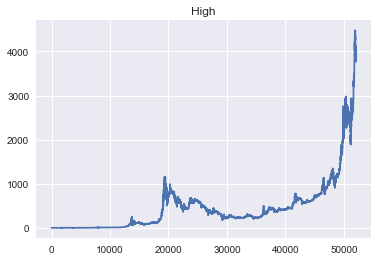

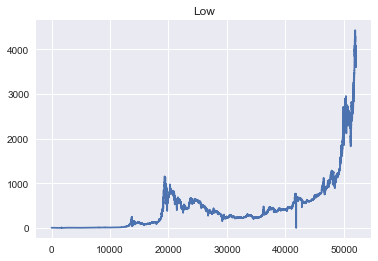

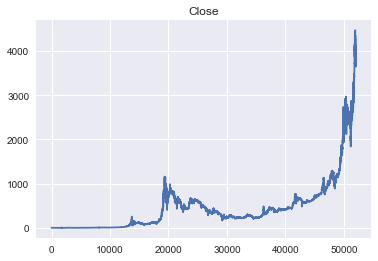

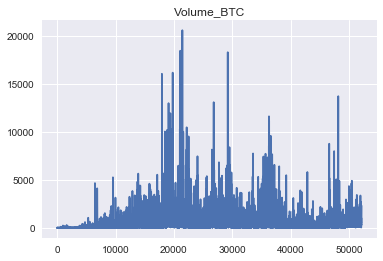

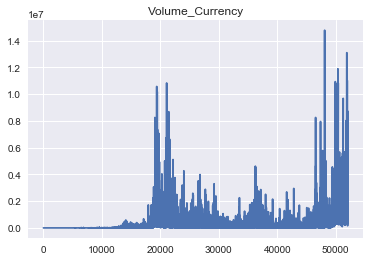

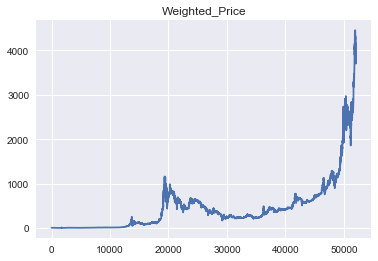

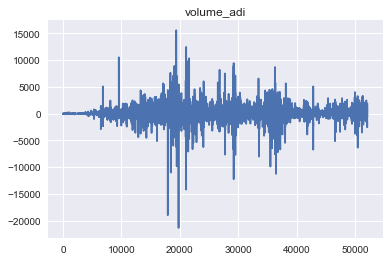

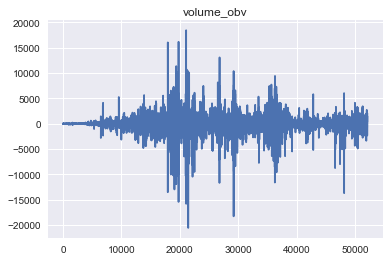

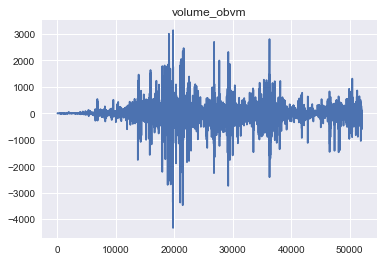

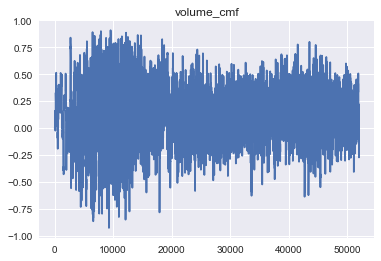

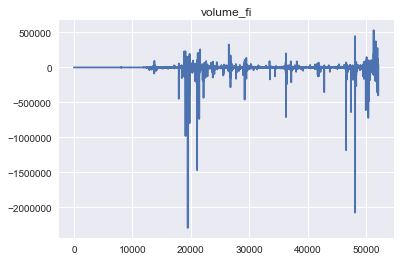

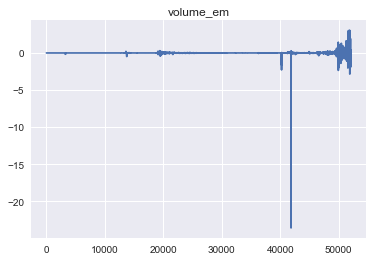

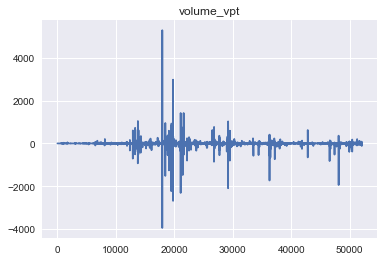

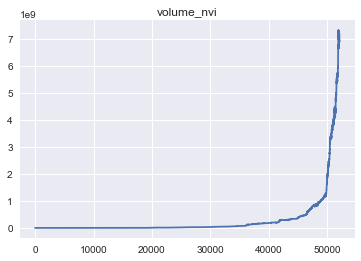

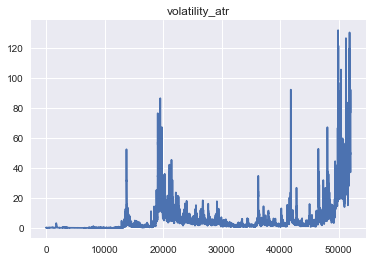

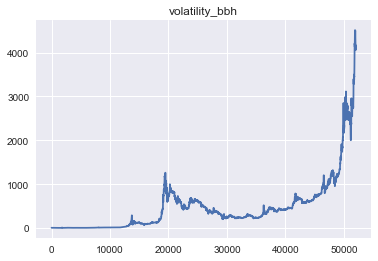

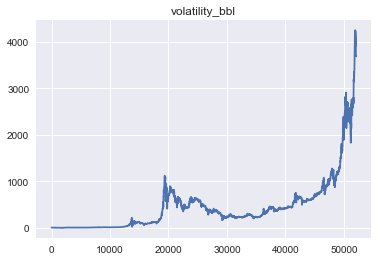

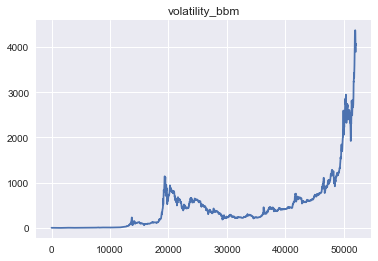

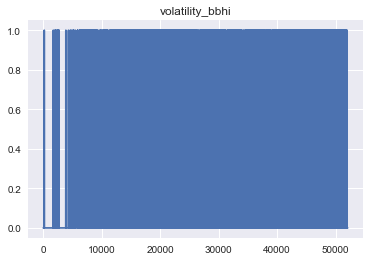

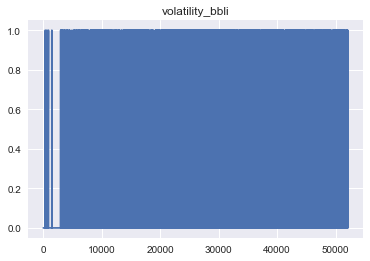

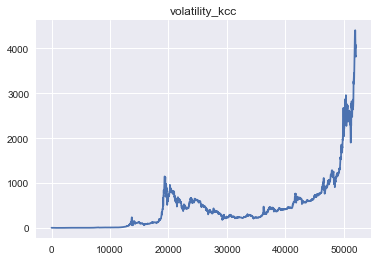

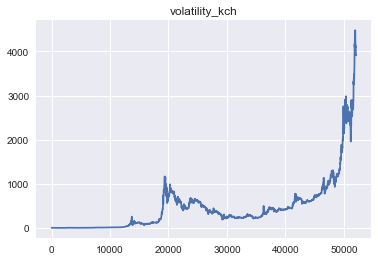

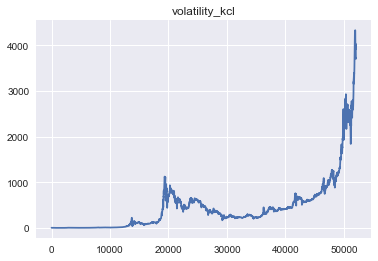

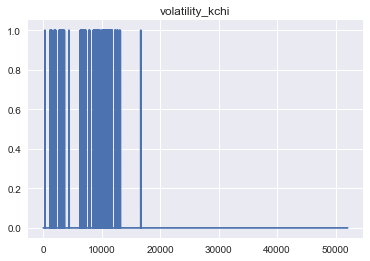

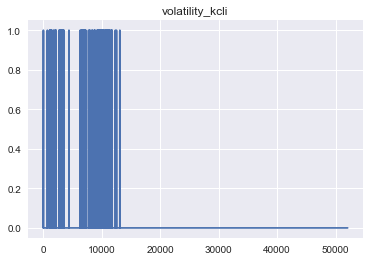

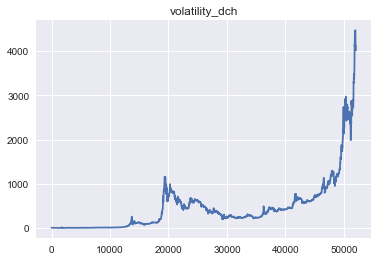

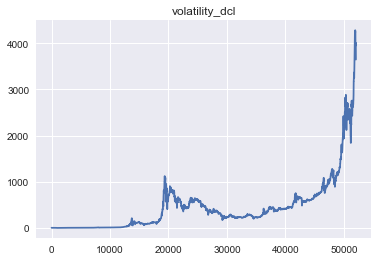

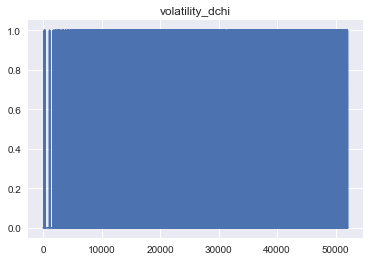

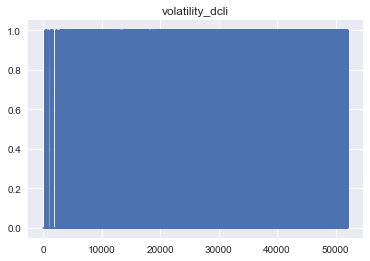

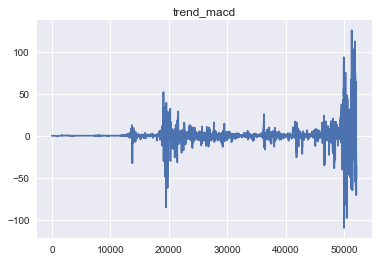

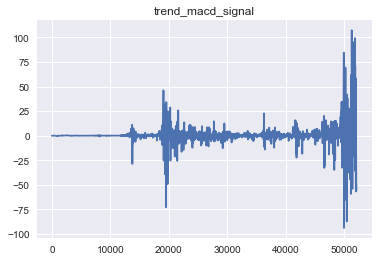

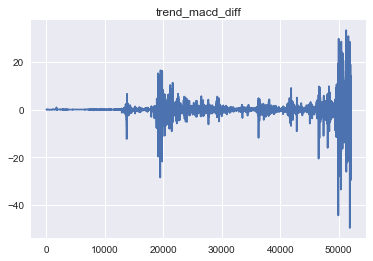

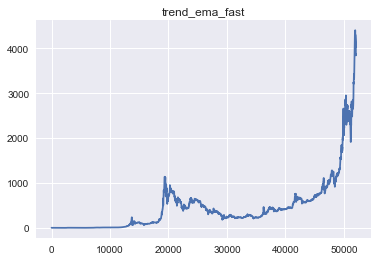

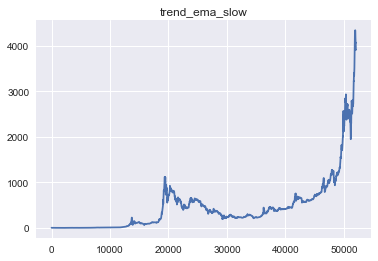

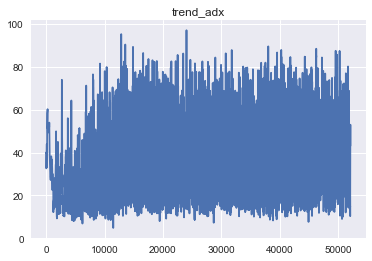

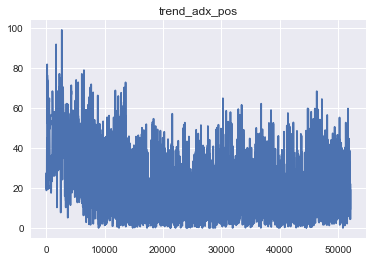

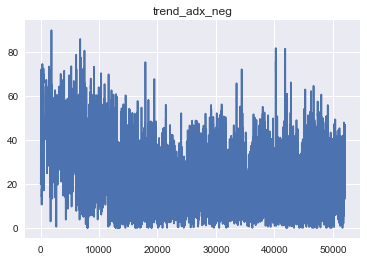

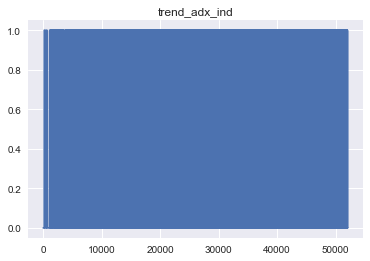

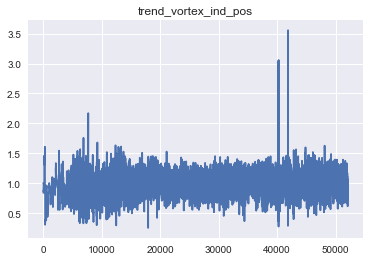

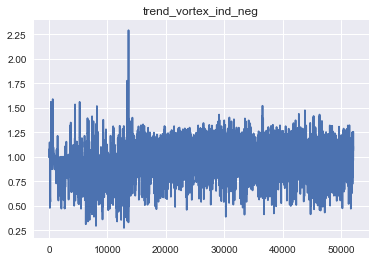

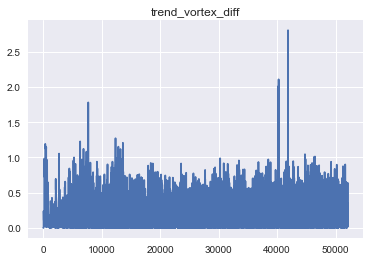

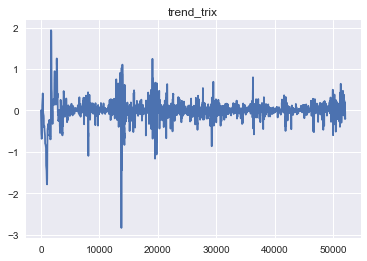

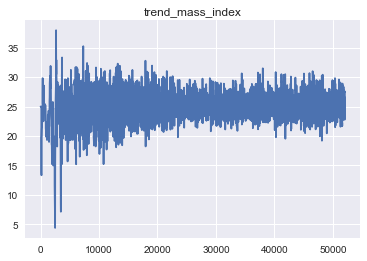

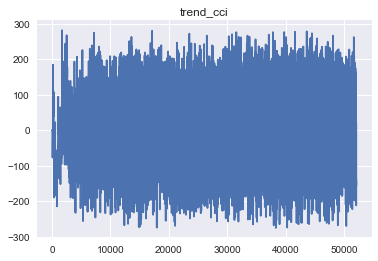

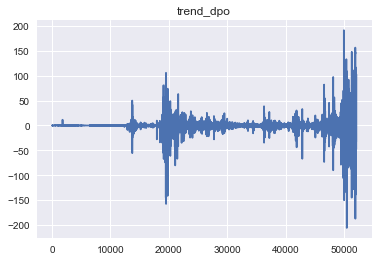

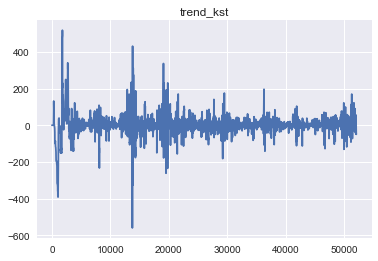

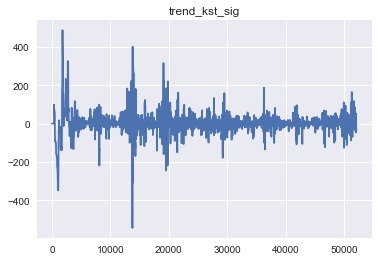

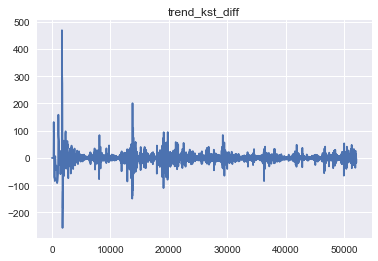

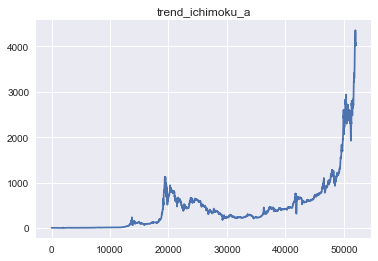

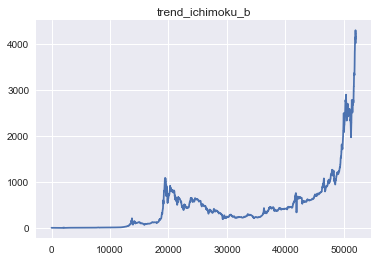

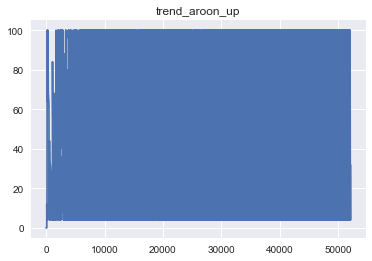

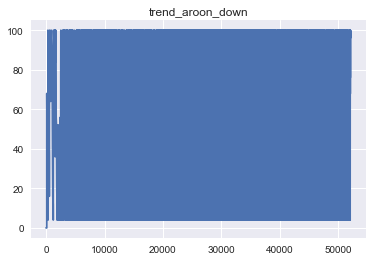

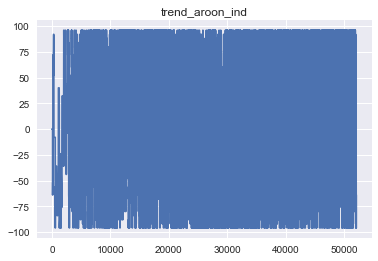

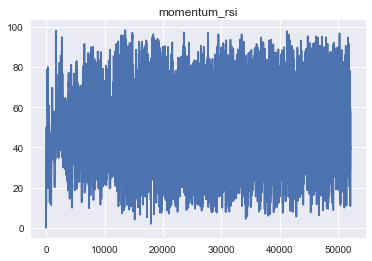

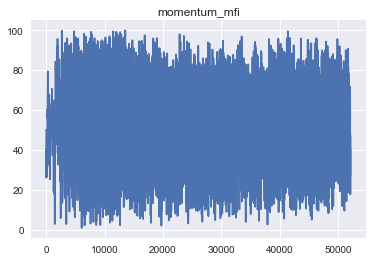

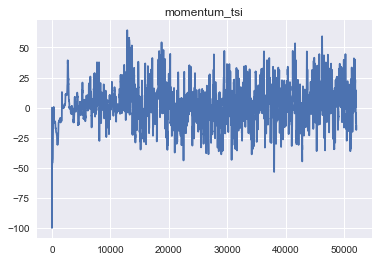

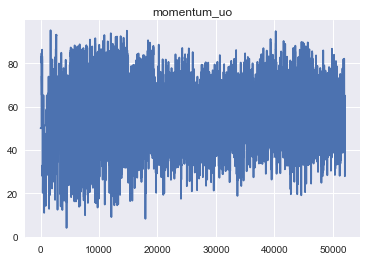

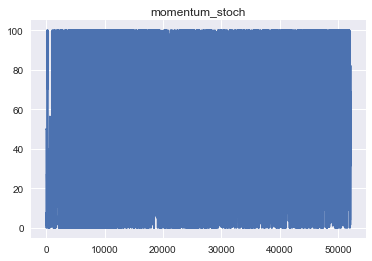

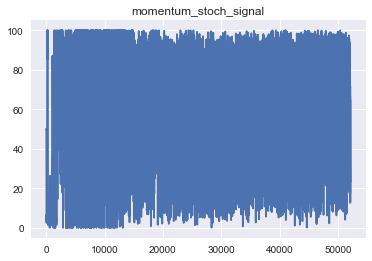

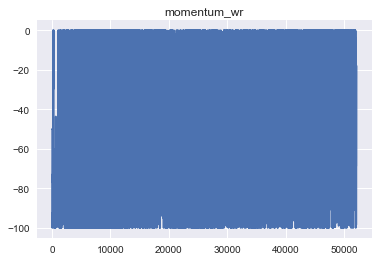

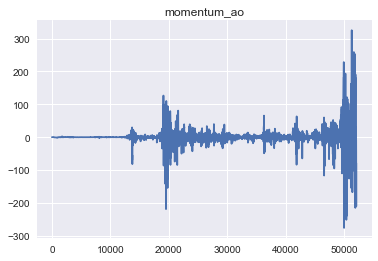

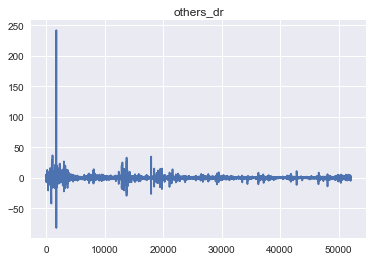

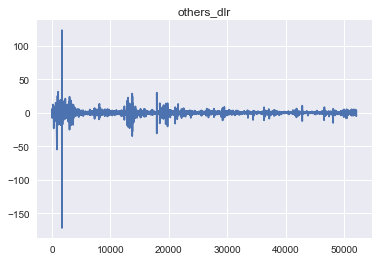

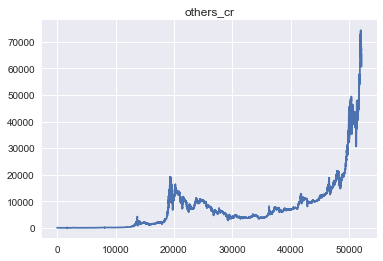

In [13]:
for col in df.columns:
    plt.plot(df[col])
    plt.title(col)
    plt.show()